# Do Rating Count and Rating Influence the Success of Mobile Games at the Google Play Store
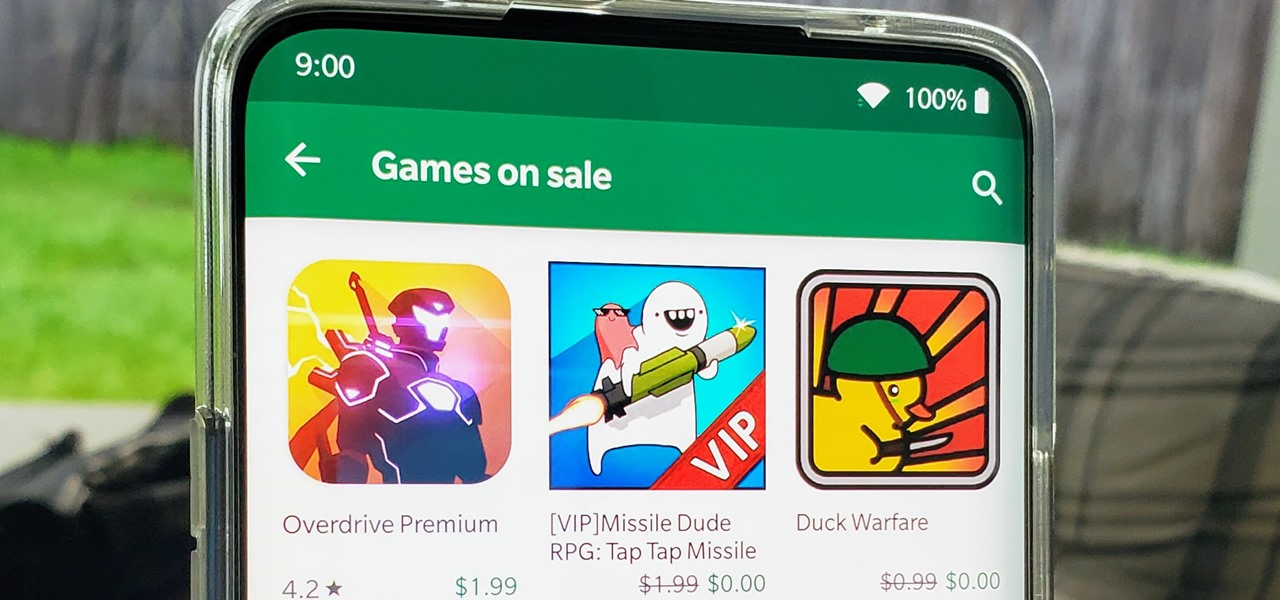

## Presentation Outline

- Problem Statement
- Goals
- Strategy to Problem Solving
- Process
- Model and Solution
- Improvement from Initial Models
- Recommendations

## Problem Statement

It is believed that the Rating and Rating Count affects the number of installs that a mobile game can get.

- **Rating:** It is the average of all the ratings that a mobile game has. The lower possible rating is 1.0, and the higher possible rating is 5.0.
- **Rating Count:** Number of ratings that a mobile game has.

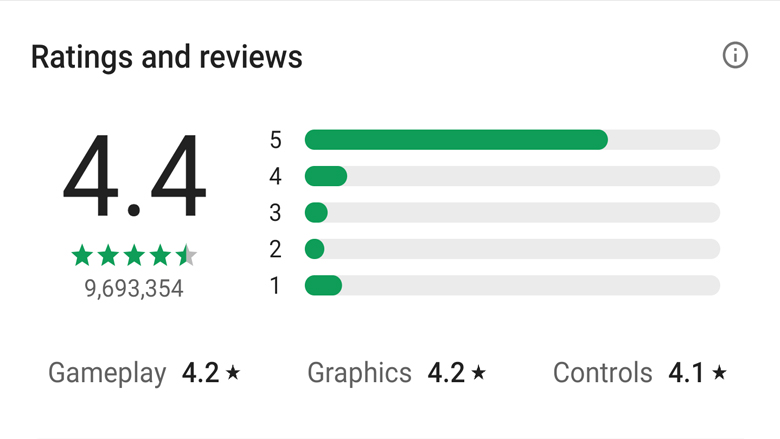

## Goals

- Research to what extent Rating and Rating Count influence the success of a mobile game.
- Implement a KNN model that predicts the success of mobile games with at least 80% accuracy.

## Strategy to Problem Solving

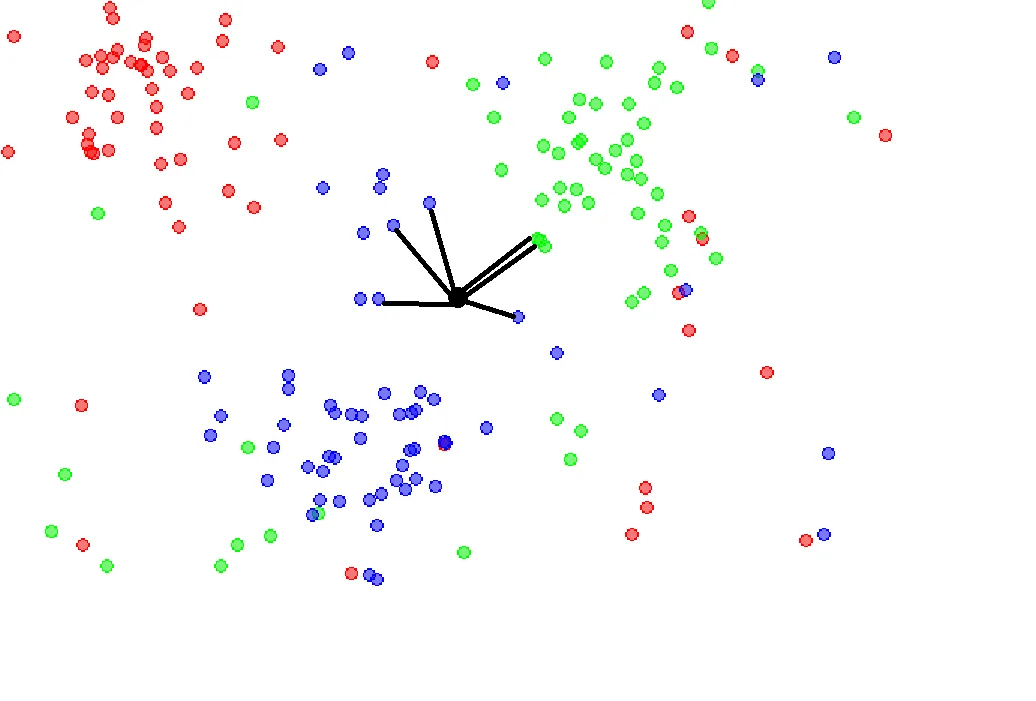

## Process

- Analyze how strong is the relationship between Rating, Rating Count, and Maximum Installs.
- Create a model that uses Rating and Rating count to predict the success of mobile games.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

apps_data = pd.read_csv("Mobile Game Data Modified.csv")
sns.set(rc = {'figure.figsize':(8,6)})

### Rating Count vs Maximum Installs

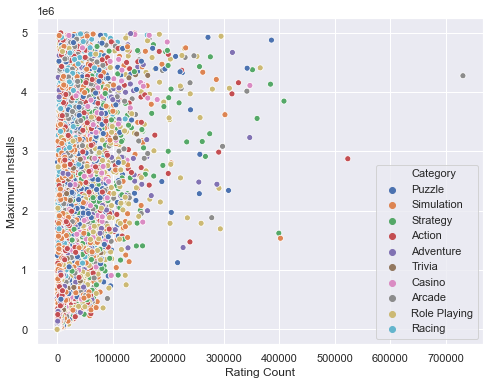

In [9]:
vis1 = sns.scatterplot(x = 'Rating Count', y = 'Maximum Installs', data = apps_data, hue = 'Category')

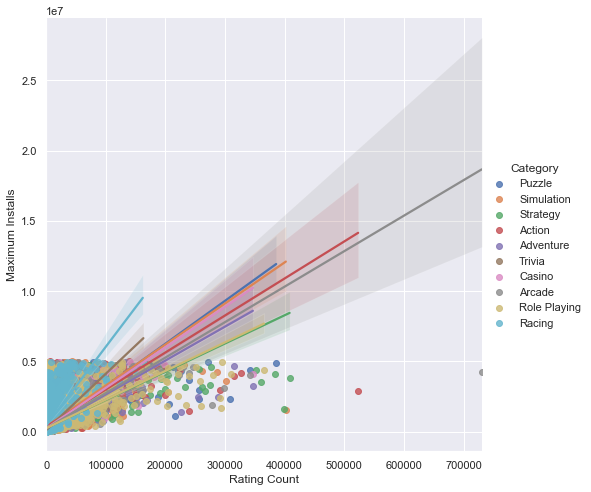

In [13]:
model = sns.lmplot(x = 'Rating Count', y = 'Maximum Installs', data = apps_data, height = 7, hue = 'Category')

### Rating vs Maximum Installs

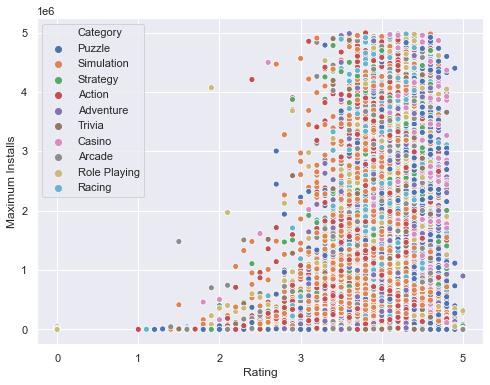

In [14]:
vis5 = sns.scatterplot('Rating', 'Maximum Installs', data = apps_data, hue = 'Category')

### Histograms

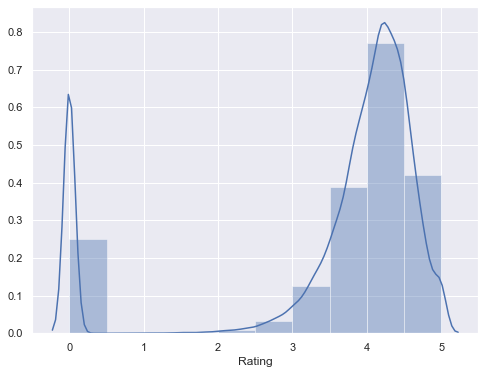

In [15]:
vis2 = sns.distplot(apps_data["Rating"], bins = 10)

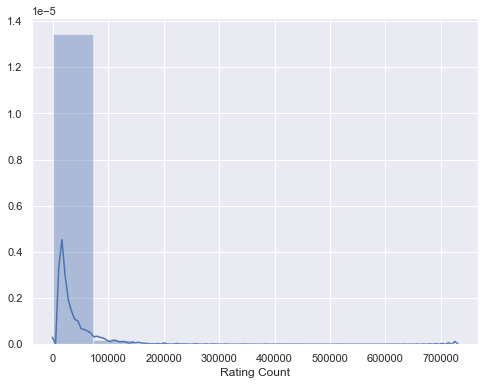

In [16]:
vis2 = sns.distplot(apps_data["Rating Count"], bins = 10)

## K Nearest Neighbors Model

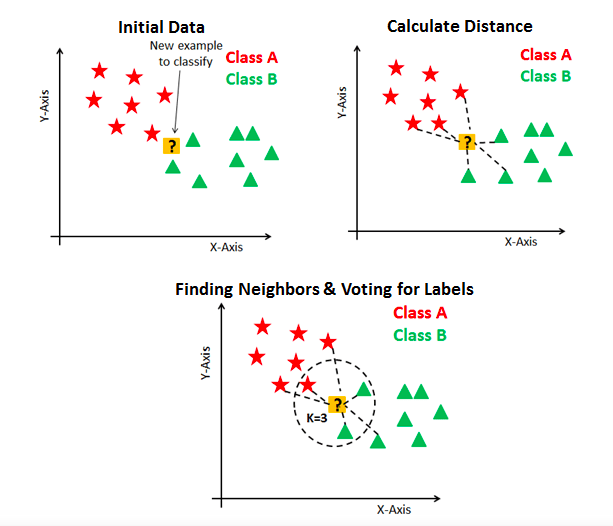

# Model and Solution

In [17]:
import csv
import random
import math
import operator

def readingDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(2):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
                
def calculatingDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def findKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = calculatingDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def votingClassification(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def calculatingAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [21]:
trainingSet=[]
testSet=[]
readingDataset(r'Sample Model Data.csv.', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)))

Train: 136
Test: 63


In [22]:
predictions = []
k = 3

for x in range(len(testSet)):
    neighbors = findKNeighbors(trainingSet, testSet[x], k)
    result = votingClassification(neighbors)
    predictions.append(result)   
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='not success', actual='success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not succe

In [23]:
accuracy = calculatingAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 92.06349206349206%


# Improvements from Initial Model

- Data set modifications
- New model
- Accuracy Improvements

# Recomendations

- Increase the Rating and Rating Count of Mobile Games
- Use small data sets
- Compare similar variables